In [25]:
import cv2
import matplotlib.pyplot as plt

import time

In [51]:
def frame_cap(idx,labels):
    cap = cv2.VideoCapture(0)
    _ , frame = cap.read() # to open the connection
    #g_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) # use this for a grayscaled version

    cv2.imwrite(f"frames/{labels}"+f"/frame_type_{labels}_{idx}.jpg",frame)
    cv2.imshow("frame",frame)
    
    cap.release() # to close the connection
    cv2.destroyAllWindows()
    return frame

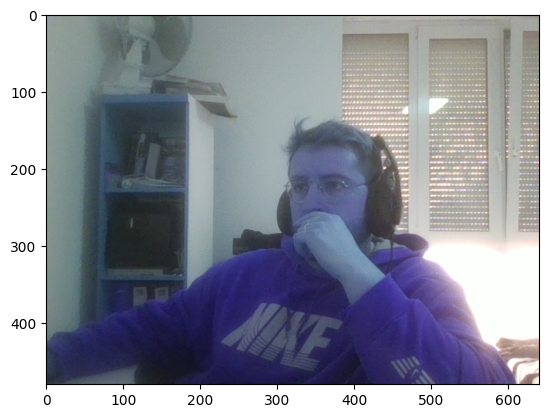

In [58]:
plt.imshow(frame_cap(0,0))

In [29]:
cap = cv2.VideoCapture(0)
object_detector = cv2.createBackgroundSubtractorMOG2(history=100,varThreshold=5)
while cap.isOpened():
    ret, frame = cap.read()
    g_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    mask = object_detector.apply(g_frame)

    # use this code to draw elements of motion
    """
    contours, _ = cv2.findContours(mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        cv2.drawContours(mask, [cnt], -1, (0,255,0), 2)
    """
    cv2.imshow("Webcam", g_frame)
    cv2.imshow("Mask",mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [55]:
labels = ["peace","hello"]
number_img = 10

In [52]:
def get_pictures():
    for label in labels:
        time.sleep(5)
        for imgnum in range(number_img):
            frame_cap(imgnum,label)
            time.sleep(2)

In [57]:
get_pictures()